In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [2]:
df = pd.read_csv("C:/Users/heetb/OneDrive/Documents/GitHub/Loan_Approval_Kaggle/credit_risk_dataset.csv")

In [3]:
# describe dataset
print(df.head(5))
# print(df.describe())
df.info()
print(df.shape)


   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [4]:
# print(df.isnull().sum())

In [5]:
# check for null values and then remove it.
sum(df.isnull().sum())

4011

In [6]:
df = df.dropna()

In [7]:
sum(df.isnull().sum())

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


# Exploratory data analysis

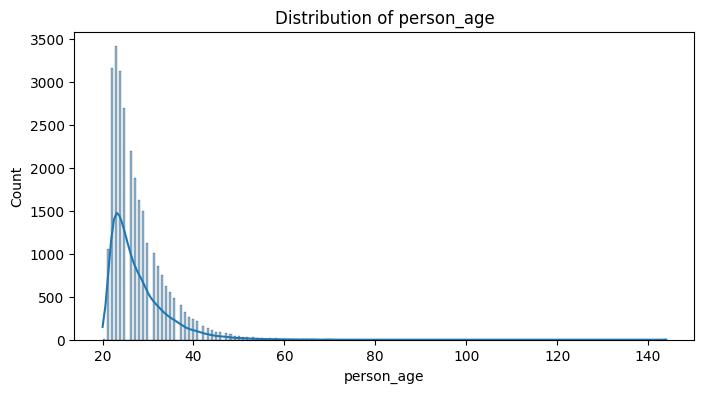

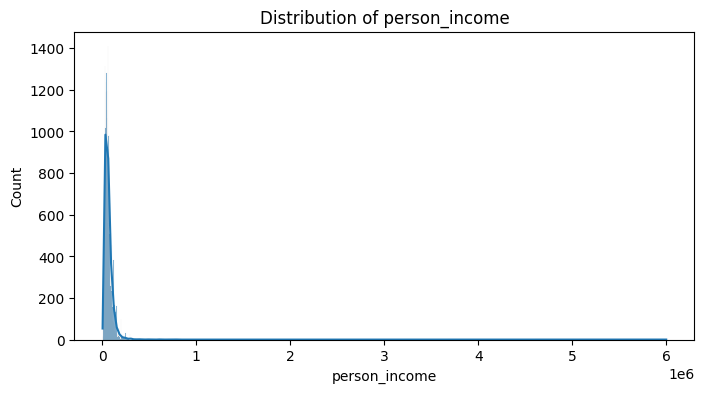

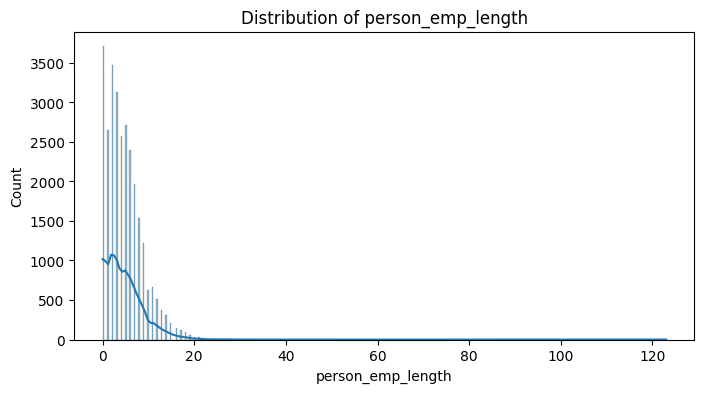

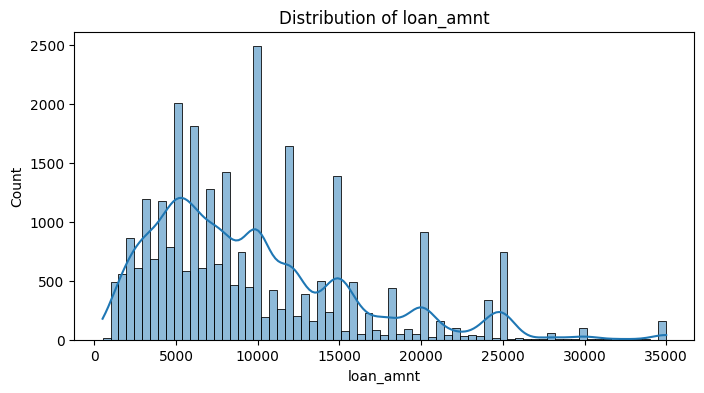

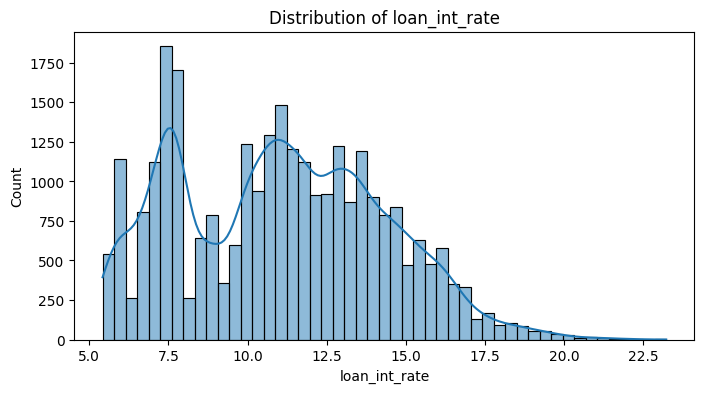

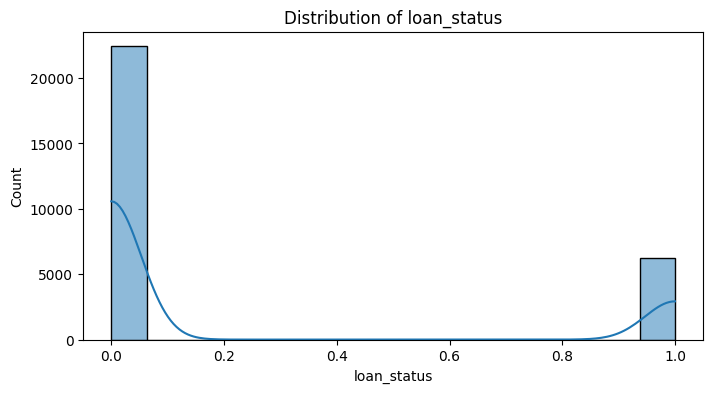

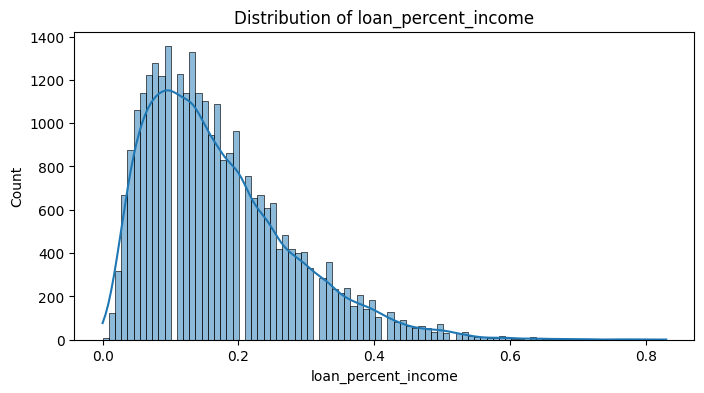

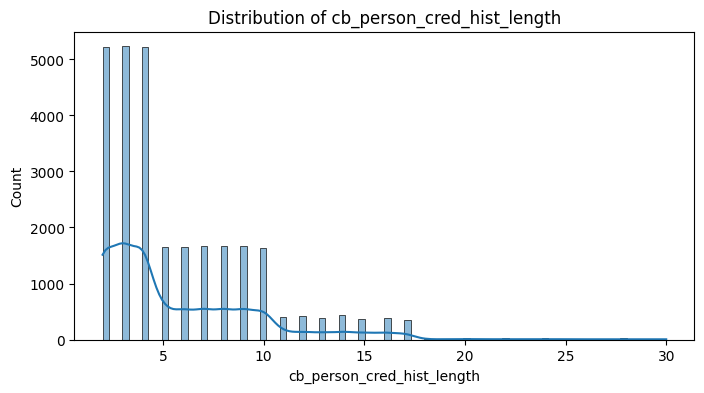

In [9]:
# create histogram for all int type columns

num_values1 = []

# cols = df.columns
num_values =df.select_dtypes(include=['number']).columns.tolist()
num_values
for col in num_values:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


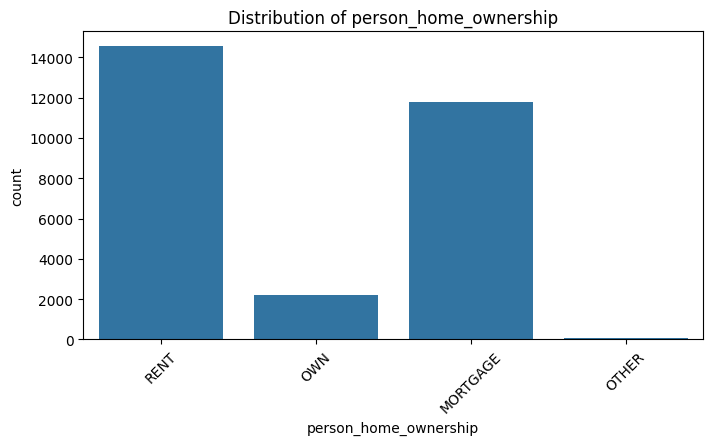

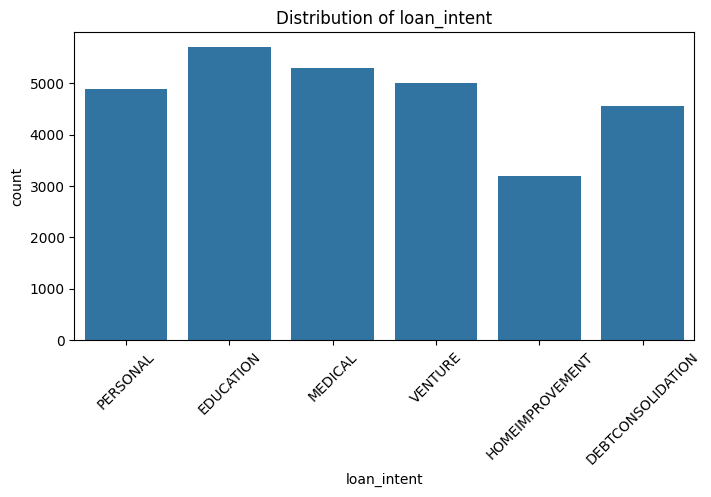

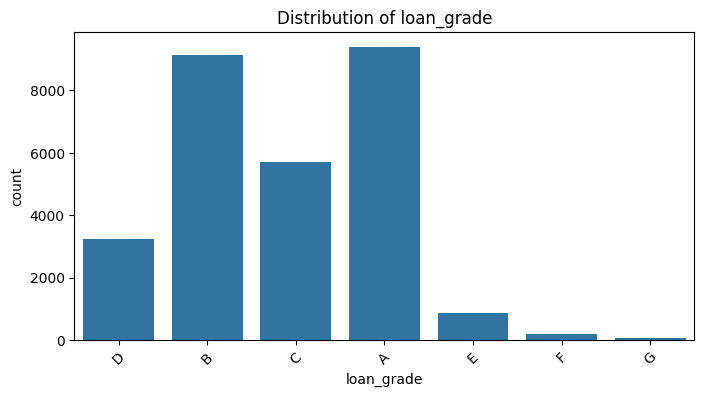

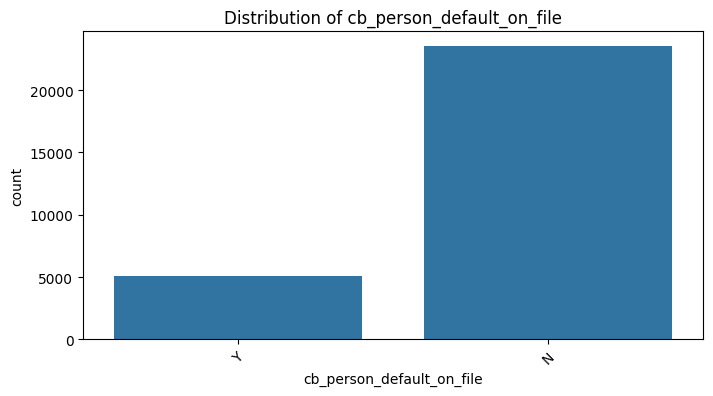

In [10]:
# let us go for categorical values. To check how many unique values it does have ?

str_values = df.select_dtypes(include=['object']).columns.tolist()
print(str_values)
for col in str_values:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotate the labels for better readability if necessary
    plt.show()

In [11]:
# Let us do convert all categorical value

# One-Hot Encoding
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'cb_person_default_on_file'], drop_first=True)

# 
df.head(5)

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
0,22,59000,123.0,D,35000,16.02,1,0.59,3,False,False,True,False,False,False,True,False,True
1,21,9600,5.0,B,1000,11.14,0,0.10,2,False,True,False,True,False,False,False,False,False
2,25,9600,1.0,C,5500,12.87,1,0.57,3,False,False,False,False,False,True,False,False,False
3,23,65500,4.0,C,35000,15.23,1,0.53,2,False,False,True,False,False,True,False,False,False
4,24,54400,8.0,C,35000,14.27,1,0.55,4,False,False,True,False,False,True,False,False,True


In [12]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=[['A', 'B', 'C','D','E','F', 'G']])
df['loan_grade'] = ordinal_encoder.fit_transform(df[['loan_grade']])
df.head(5)

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
0,22,59000,123.0,3.0,35000,16.02,1,0.59,3,False,False,True,False,False,False,True,False,True
1,21,9600,5.0,1.0,1000,11.14,0,0.10,2,False,True,False,True,False,False,False,False,False
2,25,9600,1.0,2.0,5500,12.87,1,0.57,3,False,False,False,False,False,True,False,False,False
3,23,65500,4.0,2.0,35000,15.23,1,0.53,2,False,False,True,False,False,True,False,False,False
4,24,54400,8.0,2.0,35000,14.27,1,0.55,4,False,False,True,False,False,True,False,False,True


In [13]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset (already done above, continuing with the processed `df`)
# df = pd.read_csv("path_to_file.csv")

# 1. Split the data
# Assuming 'loan_status' is the target variable
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Train-test split (we'll use the train split for validation purposes in this workflow)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [14]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_log_reg = log_reg.predict(X_val_scaled)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_val, y_pred_log_reg))
print(classification_report(y_val, y_pred_log_reg))
print(confusion_matrix(y_val, y_pred_log_reg))


Logistic Regression:
Accuracy: 0.8510824022346368
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4443
           1       0.75      0.51      0.60      1285

    accuracy                           0.85      5728
   macro avg       0.81      0.73      0.76      5728
weighted avg       0.84      0.85      0.84      5728

[[4226  217]
 [ 636  649]]


In [15]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_dt = dt.predict(X_val_scaled)
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_val, y_pred_dt))
print(classification_report(y_val, y_pred_dt))
print(confusion_matrix(y_val, y_pred_dt))



Decision Tree:
Accuracy: 0.8933310055865922
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4443
           1       0.76      0.77      0.76      1285

    accuracy                           0.89      5728
   macro avg       0.85      0.85      0.85      5728
weighted avg       0.89      0.89      0.89      5728

[[4124  319]
 [ 292  993]]


In [16]:
# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_rf = rf.predict(X_val_scaled)
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))
print(confusion_matrix(y_val, y_pred_rf))



Random Forest:
Accuracy: 0.9334846368715084
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4443
           1       0.97      0.72      0.83      1285

    accuracy                           0.93      5728
   macro avg       0.95      0.86      0.89      5728
weighted avg       0.94      0.93      0.93      5728

[[4417   26]
 [ 355  930]]


In [17]:
import lightgbm as lgb

# LightGBM
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_lgbm = lgbm.predict(X_val_scaled)
print("\nLightGBM Classifier:")
print("Accuracy:", accuracy_score(y_val, y_pred_lgbm))
print(classification_report(y_val, y_pred_lgbm))
print(confusion_matrix(y_val, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 4918, number of negative: 17992
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 973
[LightGBM] [Info] Number of data points in the train set: 22910, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.214666 -> initscore=-1.297025
[LightGBM] [Info] Start training from score -1.297025

LightGBM Classifier:
Accuracy: 0.9362779329608939
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4443
           1       0.98      0.73      0.84      1285

    accuracy                           0.94      5728
   macro avg       0.96      0.86      0.90      5728
weighted avg       0.94      0.94      0.93      5728

[[4428   15]
 [ 350  935]]


In [18]:
import xgboost as xgb

# XGBoost
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_xgb = xgb_clf.predict(X_val_scaled)
print("\nXGBoost Classifier:")
print("Accuracy:", accuracy_score(y_val, y_pred_xgb))
print(classification_report(y_val, y_pred_xgb))
print(confusion_matrix(y_val, y_pred_xgb))


C:\Users\heetb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [20:25:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Classifier:
Accuracy: 0.9373254189944135
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4443
           1       0.97      0.74      0.84      1285

    accuracy                           0.94      5728
   macro avg       0.95      0.87      0.90      5728
weighted avg       0.94      0.94      0.93      5728

[[4413   30]
 [ 329  956]]


In [20]:
# Hyperparameter tuning

from scipy.stats import uniform
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid for XGBoost
param_dist_xgb = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5)
}

# Initialize Randomized Search for XGBoost
random_search_xgb = RandomizedSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), param_distributions=param_dist_xgb, n_iter=10, cv=5, n_jobs=-1, random_state=42, verbose=2)
random_search_xgb.fit(X_train_scaled, y_train)

# Get the best model and evaluate
best_xgb = random_search_xgb.best_estimator_
print("Best parameters for XGBoost:", random_search_xgb.best_params_)
y_pred_best_xgb = best_xgb.predict(X_val_scaled)
print("\nBest XGBoost Model After Tuning:")
print("Accuracy:", accuracy_score(y_val, y_pred_best_xgb))
print(classification_report(y_val, y_pred_best_xgb))
print(confusion_matrix(y_val, y_pred_best_xgb))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\heetb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [20:28:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'colsample_bytree': 0.7599443886861021, 'gamma': 0.023332831606807714, 'learning_rate': 0.20475110376829186, 'max_depth': 5, 'n_estimators': 157, 'subsample': 0.8056937753654446}

Best XGBoost Model After Tuning:
Accuracy: 0.9354050279329609
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4443
           1       0.97      0.73      0.84      1285

    accuracy                           0.94      5728
   macro avg       0.95      0.86      0.90      5728
weighted avg       0.94      0.94      0.93      5728

[[4415   28]
 [ 342  943]]
